In [181]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import statistics
import plotly.express as px
import researchpy as rp
import pylab
import statsmodels.api as sm
import math
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from scipy.stats import kstest
from scipy.stats import shapiro
from statsmodels.stats.proportion import proportion_confint
from IPython.display import Markdown, display
from itertools import combinations

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_fscore_support as score, confusion_matrix, roc_auc_score, classification_report, log_loss
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostRegressor, AdaBoostClassifier, GradientBoostingRegressor, GradientBoostingClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_regression
from sklearn.metrics import plot_confusion_matrix, roc_curve, auc

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import mean_absolute_error, mean_squared_error

In [178]:
matches = pd.read_csv("matches_bundesliga_v2.csv", index_col=0)

In [145]:
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot,dist,fk,pk,pkatt,season,team,wwages,awages,age
0,2022-08-05,20:30,Bundesliga,Matchweek 1,Fri,Away,W,6,1,Eint Frankfurt,...,10.0,16.6,1.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
1,2022-08-14,17:30,Bundesliga,Matchweek 2,Sun,Home,W,2,0,Wolfsburg,...,8.0,18.4,0.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
2,2022-08-21,17:30,Bundesliga,Matchweek 3,Sun,Away,W,7,0,Bochum,...,11.0,18.3,1.0,1.0,1.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
3,2022-08-27,18:30,Bundesliga,Matchweek 4,Sat,Home,D,1,1,M'Gladbach,...,20.0,17.4,1.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
4,2022-09-03,15:30,Bundesliga,Matchweek 5,Sat,Away,D,1,1,Union Berlin,...,6.0,18.1,0.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3055,2019-04-20,15:30,Bundesliga,Matchweek 30,Sat,Away,L,0,2,Leverkusen,...,1.0,19.3,0.0,0.0,0.0,2019,Nurnberg,210904.0,10967000.0,24.9
3056,2019-04-28,18:00,Bundesliga,Matchweek 31,Sun,Home,D,1,1,Bayern Munich,...,4.0,20.2,1.0,0.0,1.0,2019,Nurnberg,210904.0,10967000.0,24.9
3057,2019-05-04,15:30,Bundesliga,Matchweek 32,Sat,Away,L,0,2,Wolfsburg,...,3.0,21.0,1.0,0.0,0.0,2019,Nurnberg,210904.0,10967000.0,24.9
3058,2019-05-11,15:30,Bundesliga,Matchweek 33,Sat,Home,L,0,4,M'Gladbach,...,2.0,21.0,2.0,0.0,0.0,2019,Nurnberg,210904.0,10967000.0,24.9


In [146]:
matches_w = matches[matches["result"] == "W"]

In [147]:
matches_w

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,sot,dist,fk,pk,pkatt,season,team,wwages,awages,age
0,2022-08-05,20:30,Bundesliga,Matchweek 1,Fri,Away,W,6,1,Eint Frankfurt,...,10.0,16.6,1.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
1,2022-08-14,17:30,Bundesliga,Matchweek 2,Sun,Home,W,2,0,Wolfsburg,...,8.0,18.4,0.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
2,2022-08-21,17:30,Bundesliga,Matchweek 3,Sun,Away,W,7,0,Bochum,...,11.0,18.3,1.0,1.0,1.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
7,2022-09-30,20:30,Bundesliga,Matchweek 8,Fri,Home,W,4,0,Leverkusen,...,9.0,16.6,2.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
9,2022-10-16,19:30,Bundesliga,Matchweek 10,Sun,Home,W,5,0,Freiburg,...,8.0,18.4,0.0,0.0,0.0,2023,Bayern Munich,5047500.0,262470000.0,26.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3022,2019-04-27,15:30,Bundesliga,Matchweek 31,Sat,Home,W,1,0,Mainz 05,...,3.0,17.9,0.0,0.0,0.0,2019,Hannover 96,NaN,NaN,26.3
3024,2019-05-11,15:30,Bundesliga,Matchweek 33,Sat,Home,W,3,0,Freiburg,...,6.0,17.9,1.0,0.0,0.0,2019,Hannover 96,NaN,NaN,26.3
3029,2018-09-22,15:30,Bundesliga,Matchweek 4,Sat,Home,W,2,0,Hannover 96,...,6.0,20.1,1.0,0.0,0.0,2019,Nurnberg,210904.0,10967000.0,24.9
3031,2018-09-29,15:30,Bundesliga,Matchweek 6,Sat,Home,W,3,0,Düsseldorf,...,5.0,22.7,0.0,1.0,1.0,2019,Nurnberg,210904.0,10967000.0,24.9


In [7]:
formations = matches["formation"].unique()

In [8]:
formation_wins = matches_w["formation"].value_counts()

In [18]:
formation_wins

4-2-3-1       346
3-4-3         212
4-3-3         119
3-5-2          92
4-4-2          67
3-4-1-2        62
4-1-4-1        57
3-1-4-2        45
4-2-2-2        45
4-1-2-1-2◆     28
4-3-1-2        26
4-1-3-2        19
4-4-1-1        15
5-3-2          12
4-5-1           7
5-4-1           3
3-5-1-1         2
4-3-2-1         1
3-2-4-1         1
3-4-3◆          1
Name: formation, dtype: int64

In [10]:
avgage = pd.read_csv("avgage_bundesliga.csv", index_col=0)

In [11]:
wages = pd.read_csv("wages_bundesliga.csv", index_col=0)

In [12]:
wages.describe()

,wwages,awages,season
count,8.900000e+01,8.900000e+01,89.000000
mean,9.609934e+05,4.997166e+07,2021.022472
std,9.496146e+05,4.937996e+07,1.414033
min,1.348080e+05,7.010000e+06,2019.000000
25%,4.123940e+05,2.144450e+07,2020.000000
50%,7.257690e+05,3.774000e+07,2021.000000
75%,1.039423e+06,5.405000e+07,2022.000000
max,5.047500e+06,2.624700e+08,2023.000000


In [13]:
avgage

,team,age,season
0,Augsburg,26.5,2019
1,Bayern Munich,27.4,2019
2,Dortmund,24.8,2019
3,Dusseldorf,26.9,2019
4,Eintracht Frankfurt,26.4,2019
...,...,...,...
85,Schalke 04,27.5,2023
86,Stuttgart,24.7,2023
87,Union Berlin,27.9,2023
88,Werder Bremen,27.4,2023


[Text(0.5, 1.0, 'Distribucija prosječne starosti igrača u timovima Bundeslige')]

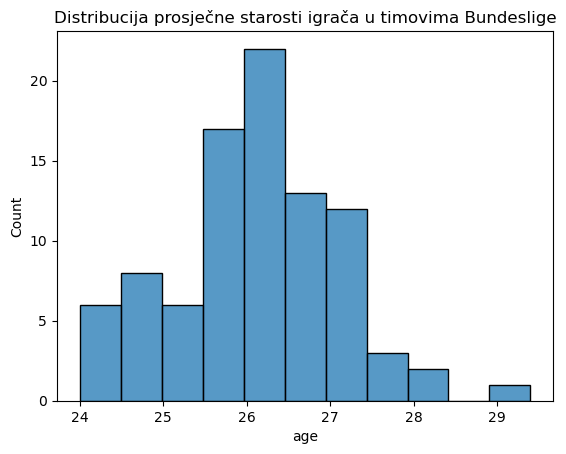

In [78]:
sns.histplot(data = avgage, x = 'age').set(title = 'Distribucija prosječne starosti igrača u timovima Bundeslige')
# plt.savefig('avg_age_bundesliga.png')

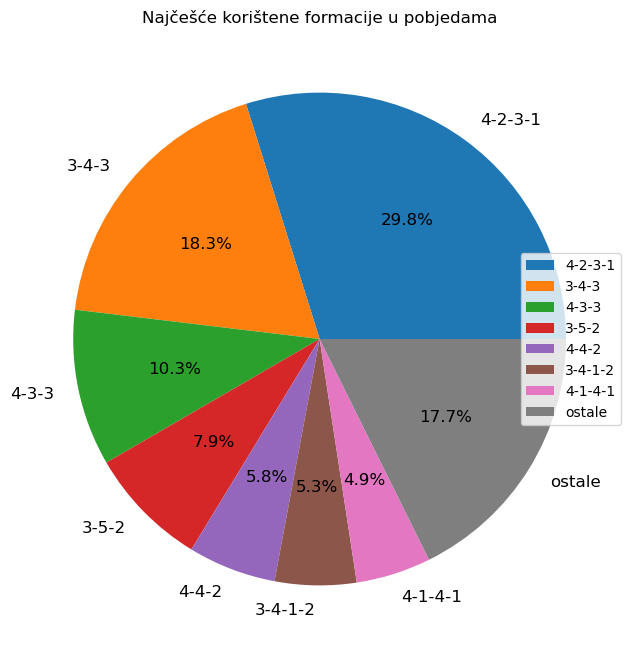

In [83]:
# Data
# Plotting
plt.figure(figsize=(8,8))
plt.pie(formation_wins2, labels=formations, autopct='%1.1f%%', textprops={'fontsize': 12})
plt.title("Najčešće korištene formacije u pobjedama")

# Legend
plt.legend(loc='right')

# plt.savefig("formations_bundesliga.png")

# Show the chart
plt.show()

In [79]:
formations=['4-2-3-1', '3-4-3', '4-3-3', '3-5-2', '4-4-2', '3-4-1-2', '4-1-4-1', 'ostale']

In [19]:
formation_wins2 = [346, 212, 119, 92, 67, 62, 57, 205]

In [21]:
round(matches.attendance.mean(), 0)

36395.0

In [22]:
teams = matches["team"].unique()

In [23]:
team_attendances = round(matches.groupby("team").attendance.mean(), 0)

In [24]:
teams.sort()

In [25]:
teams

array(['Arminia', 'Augsburg', 'Bayer Leverkusen', 'Bayern Munich',
       'Bochum', 'Dortmund', 'Dusseldorf', 'Eintracht Frankfurt',
       'Freiburg', 'Greuther Furth', 'Hannover 96', 'Hertha BSC',
       'Hoffenheim', 'Koln', 'Mainz 05', 'Monchengladbach', 'Nurnberg',
       'Paderborn 07', 'RB Leipzig', 'Schalke 04', 'Stuttgart',
       'Union Berlin', 'Werder Bremen', 'Wolfsburg'], dtype=object)

In [26]:
team_attendances

team
Arminia                16330.0
Augsburg               30612.0
Bayer Leverkusen       29985.0
Bayern Munich          52014.0
Bochum                 27592.0
Dortmund               52795.0
Dusseldorf             42133.0
Eintracht Frankfurt    39140.0
Freiburg               30292.0
Greuther Furth         16811.0
Hannover 96            40479.0
Hertha BSC             38296.0
Hoffenheim             29357.0
Koln                   38443.0
Mainz 05               29971.0
Monchengladbach        39588.0
Nurnberg               41595.0
Paderborn 07           28196.0
RB Leipzig             36398.0
Schalke 04             50393.0
Stuttgart              39159.0
Union Berlin           26896.0
Werder Bremen          42128.0
Wolfsburg              28128.0
Name: attendance, dtype: float64

In [148]:
del matches["comp"]
del matches["notes"]

In [149]:
matches.loc[matches.attendance.isna()==True, 'attendance'] = round(matches.attendance.mean(), 0)

In [150]:
matches.loc[matches.dist.isna()==True, 'dist'] = round(matches.dist.mean(), 0)

In [151]:
matches.loc[matches.wwages.isna()==True, 'wwages'] = round(matches.wwages.mean(), 0)

In [152]:
matches.loc[matches.awages.isna()==True, 'awages'] = round(matches.awages.mean(), 0)

In [153]:
matches["target"] = (matches["result"] == "W").astype("int")

In [154]:
matches["date"] = pd.to_datetime(matches["date"])

In [155]:
matches["venue_code"] = matches["venue"].astype("category").cat.codes

In [156]:
matches["opp_code"] = matches["opponent"].astype("category").cat.codes

In [157]:
matches["hour"] = matches["time"].str.replace(":.+", "", regex=True).astype("int")

In [158]:
matches["day_code"] = matches["date"].dt.dayofweek

In [159]:
matches["captain_code"] = matches["captain"].astype("category").cat.codes
matches["referee_code"] = matches["referee"].astype("category").cat.codes

In [160]:
matches["formation_code"] = matches["formation"].astype("category").cat.codes

In [161]:
matches["age_int"] = (round(matches["age"], 0)).astype("int")

In [162]:
def categorize_wwages(wwages):
    if wwages > 1400000:
        return 1
    elif 500000 < wwages <= 1400000:
        return 2
    else:
        return 3

In [163]:
def categorize_awages(awages):
    if awages > 100000000:
        return 1
    elif 3500000 < awages <= 100000000:
        return 2
    else:
        return 3

In [164]:
matches['wwages_category'] = matches['wwages'].apply(categorize_wwages)

In [165]:
matches['awages_category'] = matches['awages'].apply(categorize_awages)

In [166]:
predictors = ["venue_code", "opp_code", "hour", "day_code", "captain_code", "referee_code", "formation_code", "age_int", "wwages_category", "awages_category"]

In [167]:
X_train,X_test,y_train,y_test = train_test_split(matches[predictors], matches['target'], test_size=0.2, stratify = matches['target'], random_state=42)

# X_train,X_test,y_train,y_test = train_test_split(matches_rolling[predictors], matches_rolling['target'], test_size=0.2, stratify = matches_rolling['target'], random_state=42)

train = matches[matches["date"] < '2023-01-24']
test = matches[matches["date"] > '2023-01-24']

In [168]:
test

,date,time,round,day,venue,result,gf,ga,opponent,xg,...,venue_code,opp_code,hour,day_code,captain_code,referee_code,formation_code,age_int,wwages_category,awages_category
17,2023-01-28,18:30,Matchweek 18,Sat,Home,D,1,1,Eint Frankfurt,1.6,...,1,6,18,5,133,26,9,27,1,1
18,2023-02-05,17:30,Matchweek 19,Sun,Away,W,4,2,Wolfsburg,0.5,...,0,23,17,6,133,13,11,27,1,1
19,2023-02-11,15:30,Matchweek 20,Sat,Home,W,3,0,Bochum,3.7,...,1,3,15,5,133,18,0,27,1,1
20,2023-02-18,15:30,Matchweek 21,Sat,Away,L,2,3,M'Gladbach,1.1,...,0,14,15,5,133,31,0,27,1,1
21,2023-02-26,17:30,Matchweek 22,Sun,Home,W,3,0,Union Berlin,3.6,...,1,21,17,6,133,15,11,27,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
607,2023-04-30,15:30,Matchweek 30,Sun,Away,L,0,2,Bayern Munich,0.1,...,0,2,15,6,89,19,16,26,2,2
608,2023-05-06,15:30,Matchweek 31,Sat,Home,W,2,1,Stuttgart,1.2,...,1,20,15,5,89,7,16,26,2,2
609,2023-05-12,20:30,Matchweek 32,Fri,Away,L,2,5,Köln,1.1,...,0,12,20,4,89,26,16,26,2,2
610,2023-05-20,15:30,Matchweek 33,Sat,Home,D,1,1,Bochum,1.2,...,1,3,15,5,61,8,14,26,2,2


In [169]:
# ada = AdaBoostClassifier(n_estimators=70, random_state=42, learning_rate=1.826)
# ada = RandomForestClassifier(n_estimators=54, min_samples_split=17, random_state=42, max_depth=9)
ada = MLPClassifier(alpha=0.02, max_iter=100, random_state=42)
ada.fit(train[predictors], train["target"])
accuracy = accuracy_score(test["target"], ada.predict(test[predictors]))
precision = precision_score(test["target"], ada.predict(test[predictors]))

# feature_importance = ada.feature_importances_

In [30]:
feature_importance

array([0.07170596, 0.16412778, 0.04403847, 0.0540128 , 0.17464051,
       0.12478901, 0.09916105, 0.0593016 , 0.14979823, 0.0584246 ])

In [170]:
accuracy

0.6645569620253164

In [171]:
precision

0.875

In [50]:
feature_names = ["Mjesto", "Protivnik", "Satnica", "Dan u sedmici", "Kapiten", "Sudija", "Formacija", "Prosjek godina", "Sedmična plata", "Godišnja plata"]

for i in range(0, 9):
    print(feature_names[i], "-", feature_importance[i])

Mjesto - 0.07170596106591705
Protivnik - 0.16412777882074933
Satnica - 0.04403846989819098
Dan u sedmici - 0.05401279786581511
Kapiten - 0.17464051248066093
Sudija - 0.12478900664345537
Formacija - 0.0991610516305979
Prosjek godina - 0.059301596662696465
Sedmična plata - 0.14979822518901625


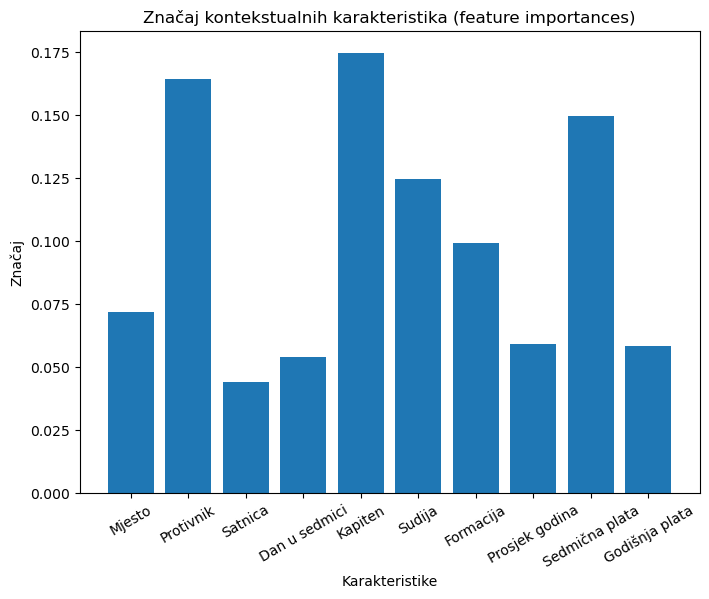

In [86]:
# import matplotlib.pyplot as plt

# Assuming you have already calculated the feature_importance array

# Create a list of feature names
feature_names = ["Mjesto", "Protivnik", "Satnica", "Dan u sedmici", "Kapiten", "Sudija", "Formacija", "Prosjek godina", "Sedmična plata", "Godišnja plata"]

# Plotting the feature importances
plt.figure(figsize=(8, 6))
plt.bar(range(len(feature_importance)), feature_importance, tick_label=feature_names)
plt.title("Značaj kontekstualnih karakteristika (feature importances)")
plt.xlabel("Karakteristike")
plt.ylabel("Značaj")
plt.xticks(rotation=30)
# plt.savefig("features_bundesliga.png")
plt.show()

In [172]:
combined = pd.DataFrame(dict(actual=test["target"], predicted=ada.predict(test[predictors])))

In [173]:
pd.crosstab(index=combined["actual"], columns=combined["predicted"])

predicted,0,1
actual,,
0,196,2
1,104,14


In [214]:
classifiers = [
#     KNeighborsClassifier(2),
#     KNeighborsClassifier(3),
#     KNeighborsClassifier(4),
#     KNeighborsClassifier(5), #ne valjaju ovi nikako
#     LogisticRegression(), #svi su 61%, nema razlike
#     SVC(kernel="linear", C=0.025, probability=True),
#     SVC(kernel="linear", C=0.05, probability=True),
#     SVC(kernel="linear", C=0.075, probability=True),
#     GaussianProcessClassifier(1.0 * RBF(1.0)),
#     DecisionTreeClassifier(max_depth=4),
#     DecisionTreeClassifier(max_depth=5),
#     DecisionTreeClassifier(max_depth=6),
#     DecisionTreeClassifier(max_depth=8),
    ## n_estimators = 43 najbolji rez
    ## min_samples_split = 11 najbolji rez
    
#     AdaBoostClassifier(learning_rate=1.544, n_estimators=52, random_state=42) -> 0.6894736842105263
    
#     AdaBoostClassifier(learning_rate=1.53, n_estimators=45, random_state=42) -> 0.6881578947368421

#     AdaBoostClassifier(learning_rate=1.55, n_estimators=52, random_state=42) -> 0.6855263157894737
    
#     AdaBoostClassifier(learning_rate=1.5, n_estimators=46, random_state=42) -> 0.6789473684210526
    
#     RandomForestClassifier(n_estimators=53, min_samples_split=11, random_state=42, max_depth=9) -> 0.6710526315789473
    
#     min_samples_split=14, random_state=42, max_depth=13)
#     min_samples_split=14, random_state=42, max_depth=14)    
    
#     AdaBoostClassifier(learning_rate=1.3164, n_estimators=61, random_state=42) -> 0.7072538860103627
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']

#     AdaBoostClassifier(learning_rate=1.3624, n_estimators=45, random_state=42) -> 0.7046632124352331
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']
    
#     AdaBoostClassifier(learning_rate=1.364, n_estimators=45, random_state=42) -> 0.7020725388601037
#     train = matches[matches["date"] < '2023-01-15'],    test = matches[matches["date"] > '2023-01-15']
      
    RandomForestClassifier(n_estimators=45, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=46, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=47, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=48, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=49, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=50, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=51, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=52, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=53, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=54, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=55, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=56, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=57, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=58, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=59, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=60, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=61, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=62, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=63, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=64, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=65, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=66, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=67, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=68, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=69, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=70, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=71, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=72, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=73, min_samples_split=17, random_state=42, max_depth=9),
    RandomForestClassifier(n_estimators=74, min_samples_split=17, random_state=42, max_depth=9)
    
    
#     RandomForestClassifier(max_depth=10, n_estimators=15, max_features=1),
#     RandomForestClassifier(max_depth=12, n_estimators=20, max_features=1),
#     MLPClassifier(alpha=1, max_iter=1000),
#     MLPClassifier(alpha=1, max_iter=1100),
#     MLPClassifier(alpha=1, max_iter=1200),
#     AdaBoostClassifier(),
#     GaussianNB(),
#     QuadraticDiscriminantAnalysis(),
#     LGBMClassifier()
]

In [215]:
precisions = []

In [216]:
estimators = []

In [217]:
accuracies = []

In [221]:
for clf in classifiers:
#         clf.fit(X_train, y_train)
        clf.fit(train[predictors], train["target"])
#         accuracy = clf.score(X_test, y_test)
        accuracy = accuracy_score(test["target"], clf.predict(test[predictors])) 
        precision = precision_score(test["target"], clf.predict(test[predictors]))
#         mae = mean_absolute_error(test["target"], clf.predict(test[predictors]))
#         mse = mean_squared_error(test["target"], clf.predict(test[predictors]))
#         rmse = mean_squared_error(test["target"], clf.predict(test[predictors]), squared=False)

#         prediction_proba = clf.predict_proba(X_test)
#         logloss = log_loss(y_test,prediction_proba)
#         precision = score(y_test, prediction_proba)
#         conf_martrix = confusion_matrix(y_test, prediction_proba)
#         clas_report = classification_report(y_test, prediction_proba)
        estimators.append(clf)
        precisions.append(precision)
        accuracies.append(accuracy)
        print(clf, accuracy, precision)
#         print("MAE:", mae)
#         print("MSE:", mse)
#         print("RMSE:", rmse)
#         print("")

RandomForestClassifier(max_depth=9, min_samples_split=17, n_estimators=45,
                       random_state=42) 0.7056962025316456 0.7777777777777778
RandomForestClassifier(max_depth=9, min_samples_split=17, n_estimators=46,
                       random_state=42) 0.7120253164556962 0.8
RandomForestClassifier(max_depth=9, min_samples_split=17, n_estimators=47,
                       random_state=42) 0.7088607594936709 0.7954545454545454
RandomForestClassifier(max_depth=9, min_samples_split=17, n_estimators=48,
                       random_state=42) 0.7088607594936709 0.8095238095238095
RandomForestClassifier(max_depth=9, min_samples_split=17, n_estimators=49,
                       random_state=42) 0.7056962025316456 0.7906976744186046
RandomForestClassifier(max_depth=9, min_samples_split=17, n_estimators=50,
                       random_state=42) 0.7056962025316456 0.7906976744186046
RandomForestClassifier(max_depth=9, min_samples_split=17, n_estimators=51,
                      

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\stride_tricks.py:341: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  array = np.array(array, copy=False, subok=subok)


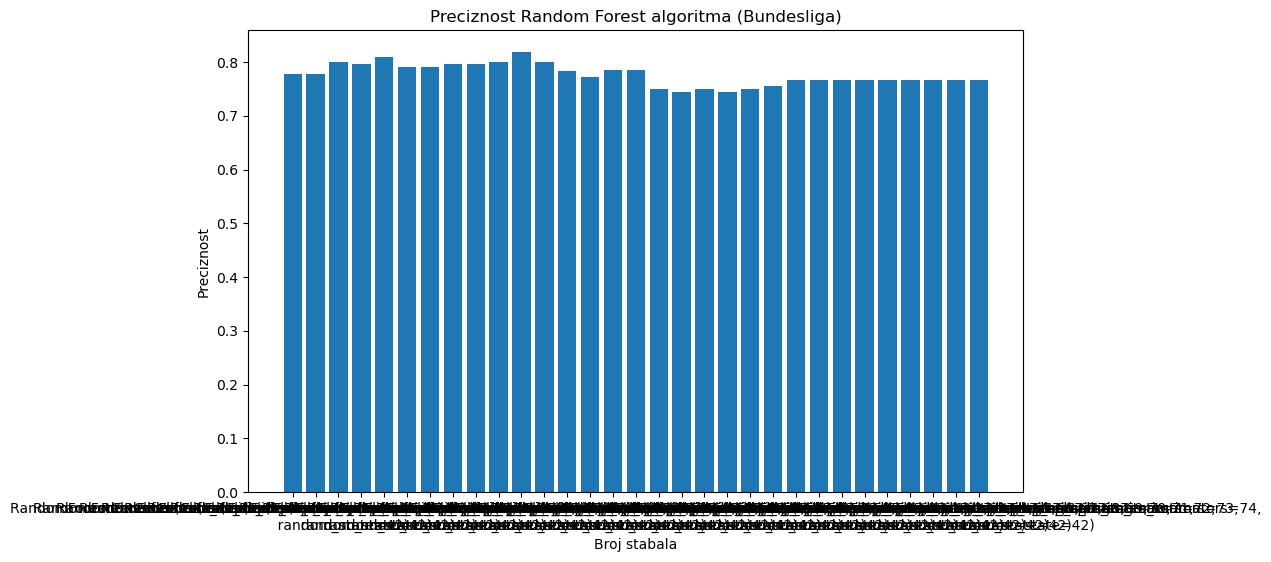

In [220]:
# Assuming you have trained and obtained the predictions from your Random Forest classifier
# X_test: Test data features
# y_test: True labels of the test data
# y_pred: Predicted labels by the Random Forest classifier

# Visualize the Data
# sns.countplot(x=ada.predict(test[predictors]))
# plt.title("Distribution of Classes")
# plt.xlabel("Class")
# plt.ylabel("Count")
# plt.show()

# # Visualize Precision
plt.figure(figsize=(10,6))
plt.bar(range(len(precisions)), precisions, tick_label=estimators)
plt.title("Preciznost Random Forest algoritma (Bundesliga)")
plt.xlabel("Broj stabala")
plt.ylabel("Preciznost")
plt.xticks()
plt.savefig("preciznost_rfa_bundesliga.png")
plt.show()

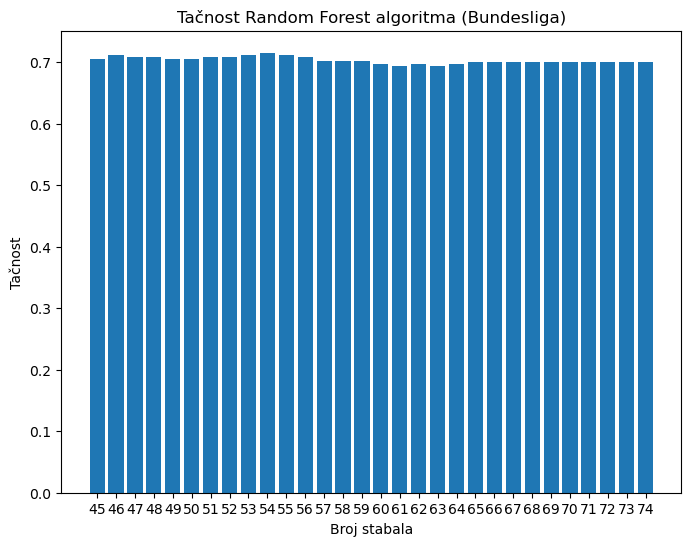

In [88]:
# # Visualize Accuracy
plt.figure(figsize=(8,6))
plt.bar(range(len(accuracies)), accuracies, tick_label=estimators)
plt.title("Tačnost Random Forest algoritma (Bundesliga)")
plt.xlabel("Broj stabala")
plt.ylabel("Tačnost")
plt.xticks()
plt.yticks()
plt.savefig("tacnost_rfa_bundesliga.png")
plt.show()

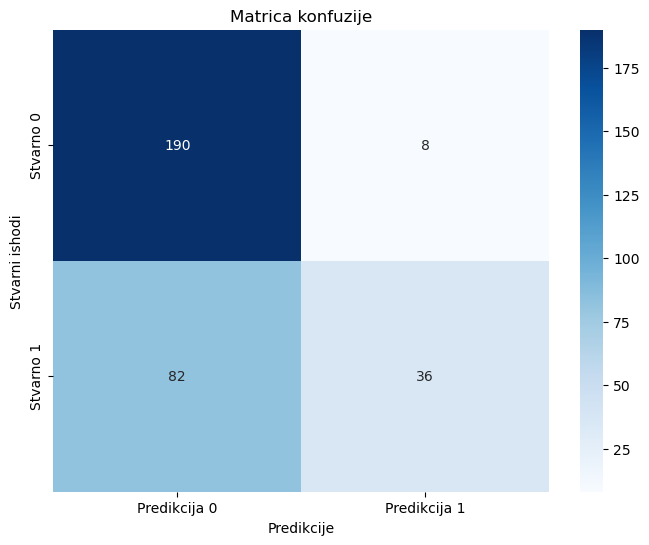

In [89]:
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(test["target"], ada.predict(test[predictors]))

# Define class labels
labels_predicted = ['Predikcija 0', 'Predikcija 1']
labels_actual = [ 'Stvarno 0', 'Stvarno 1']

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels_predicted, yticklabels=labels_actual)

# Customize plot settings
plt.title('Matrica konfuzije')
plt.xlabel('Predikcije')
plt.ylabel('Stvarni ishodi')

plt.savefig("confm_rfa_bundesliga.png")

# Display the plot
plt.show()


In [228]:
modeli = ['K-Neighbors', 'Logistic Regression', 'SVC', 'D-Tree', 'MLP', 'GNB', 'QDA', 'LGBM', 'GBM', 'LDA', 'Extra-tree', 'Bagging', 'AdaBoost', 'XGBoost', 'Random Forest']

In [229]:
accuraciesf = [62.97, 68.04, 66.77, 69.3, 66.45, 68.04, 66.77, 67.4, 68.04, 68.35, 59.81, 61.7, 71.84, 72.15, 71.52]

In [230]:
precisionsf = [51.28, 68.08, 68.57, 76.92, 87.5, 69.77, 68.57, 58.24, 63.93, 70.45, 46.34, 48.15, 67.9, 70.83, 81.82]

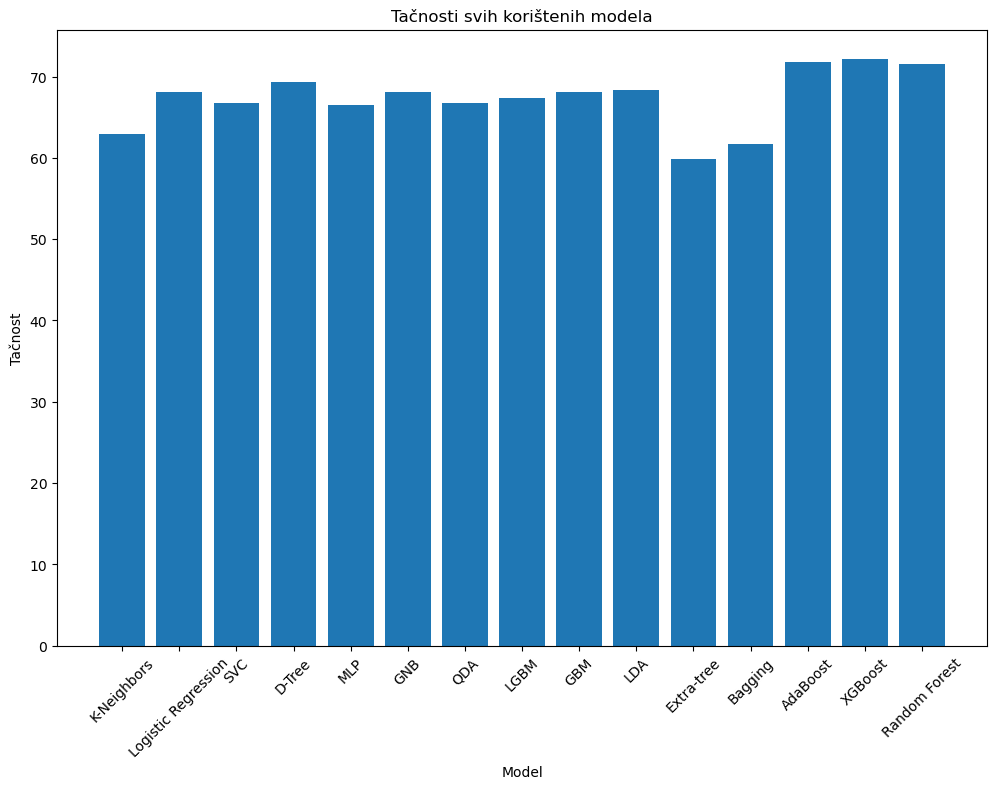

In [234]:
# # Visualize Accuracies
plt.figure(figsize=(12,8))
plt.bar(range(len(accuraciesf)), accuraciesf, tick_label=modeli)
plt.title("Tačnosti svih korištenih modela")
plt.xlabel("Model")
plt.ylabel("Tačnost")
plt.xticks(rotation=45)
plt.yticks()
plt.savefig("tacnost_ovr.png")
plt.show()

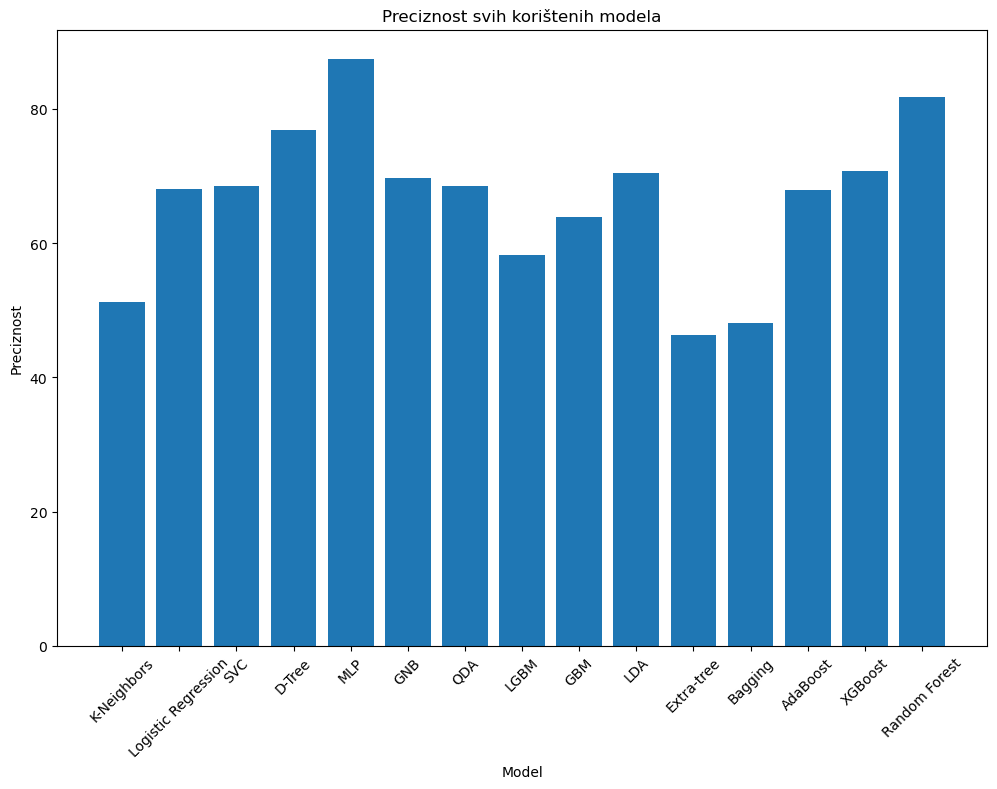

In [235]:
# # Visualize Precisions
plt.figure(figsize=(12,8))
plt.bar(range(len(precisionsf)), precisionsf, tick_label=modeli)
plt.title("Preciznost svih korištenih modela")
plt.xlabel("Model")
plt.ylabel("Preciznost")
plt.xticks(rotation=45)
plt.yticks()
plt.savefig("preciznost_ovr.png")
plt.show()